# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Create Time Series

In [2]:
def plot_time_series(time, series):
    plt.figure(figsize=(10, 6))
    plt.plot(time, series)
    plt.xlabel("time")
    plt.ylabel("value")
    plt.grid(True)
    plt.show()

In [3]:
def trend(time, slope=0):
    return slope * time

TIME:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
SERIES:  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9]


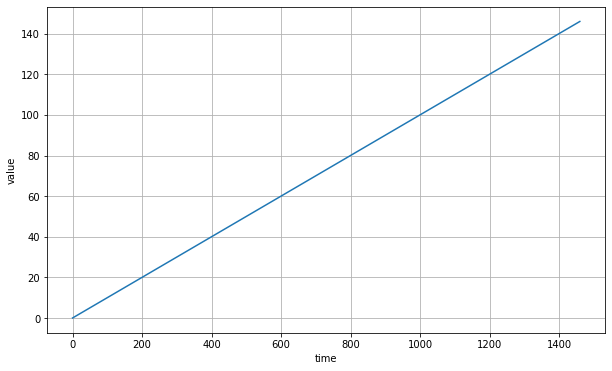

In [4]:
time = np.arange(4 * 365 + 1)
print("TIME: ", time[:20])

baseline = 10
series = trend(time, slope=0.1)
print("SERIES: ", series[:20])

plot_time_series(time, series)

# 2. Create Seasonality

In [5]:
def seasonal_pattern(season_time):
  return np.where(season_time < 0.4,
                  np.cos(season_time * 2 * np.pi),
                  1 / np.exp(3 * season_time))

In [6]:
def seasonality(time, period, amplitude=1, phase=0):
  season_time = ((time + phase) % period) / period
  return amplitude * seasonal_pattern(season_time)

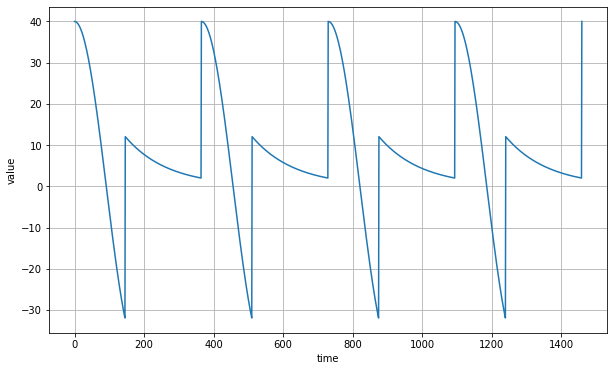

In [10]:
baseline = 10
amplitude = 40
period = 365

series = seasonality(time, period=period, amplitude=amplitude)
plot_time_series(time, series)

# 3. Add Trend & Seasonality

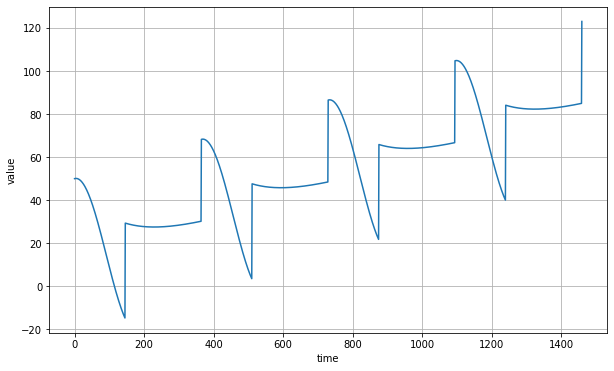

In [11]:
slope = 0.05

series = baseline + trend(time, slope=slope) + seasonality(time, period=period, amplitude=amplitude)
plot_time_series(time, series)

# 4. Add Noise to Trend & Seasonality

In [12]:
def noise(time, noise_level=1):
  return np.random.randn(len(time)) * noise_level

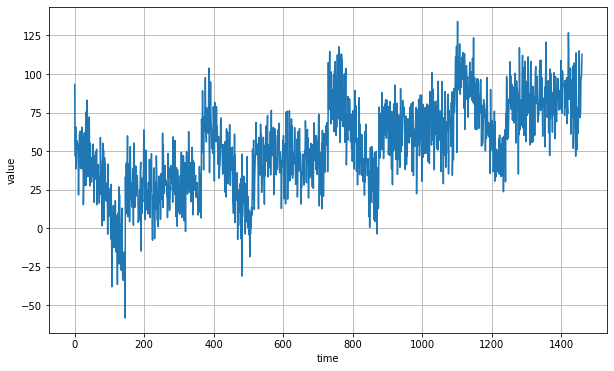

In [13]:
noise_level = 15

noisy_series = series + noise(time, noise_level)
plot_time_series(time, noisy_series)

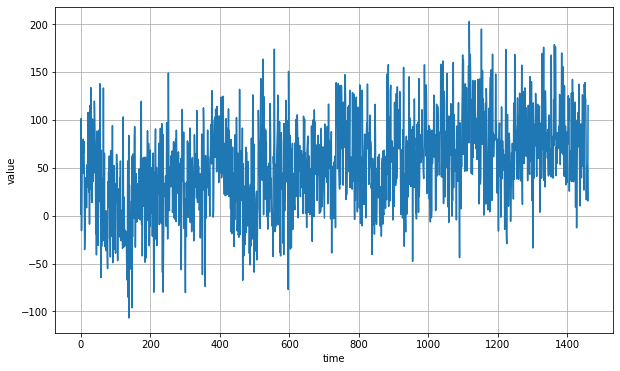

In [14]:
noise_level = 40

noisy_series = series + noise(time, noise_level)
plot_time_series(time, noisy_series)

# 5. Autocorrelation

* https://corporatefinanceinstitute.com/resources/knowledge/other/autocorrelation/

In [15]:
def autocorrelation(time, amplitude):
  rho1 = 0.5
  rho2 = -0.1
  ar = np.random.randn(len(time + 50))
  ar[:50] = 100
  for step in range(50, len(time) + 50):
      ar[step] += rho1 * ar[step - 50]
      ar[step] += rho2 * ar[step - 33]
  return ar[50:] * amplitude

In [16]:
def autocorrelation(time, amplitude):
    rho = 0.8
    ar = np.random.randn(len(time) + 1)
    for step in range(1, len(time) + 1):
        ar[step] += rho * ar[step - 1]
    return ar[1:] * amplitude

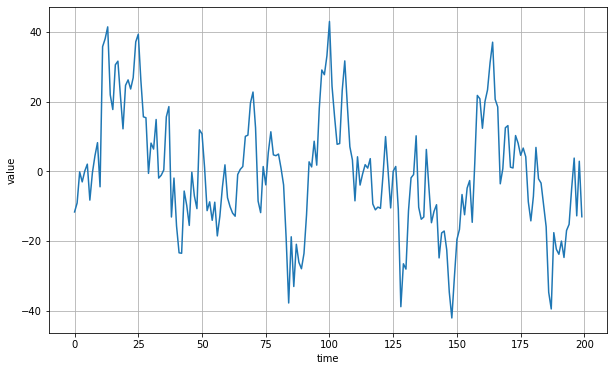

In [17]:
series = autocorrelation(time, 10)
plot_time_series(time[:200], series[:200])

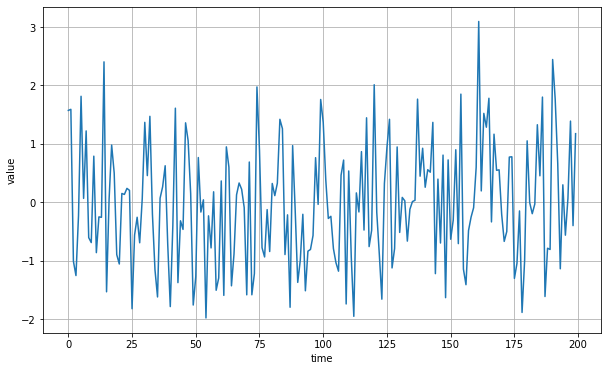

In [18]:
series = noise(time)
plot_time_series(time[:200], series[:200])

# Autocorrelation + Trend

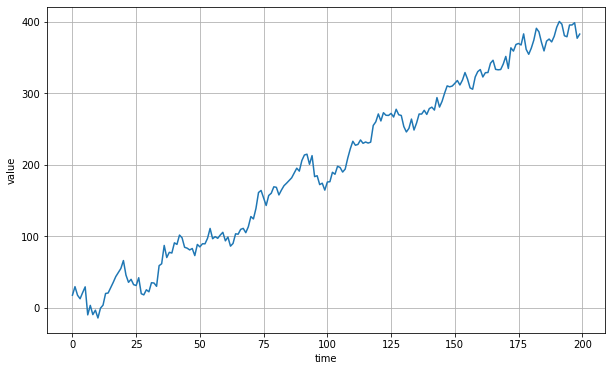

In [19]:
series = autocorrelation(time, 10) + trend(time, 2)
plot_time_series(time[:200], series[:200])

# Autocorrelation + Trend + Seasonality

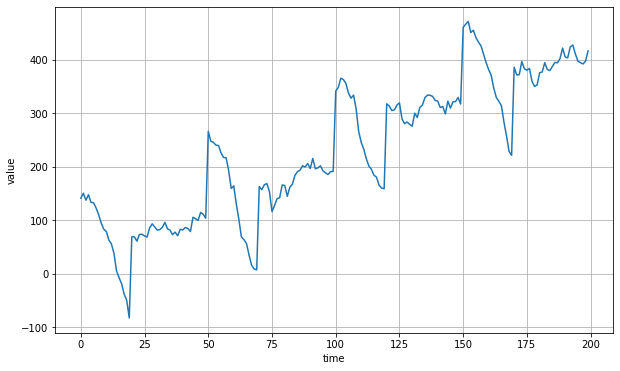

In [20]:
series = autocorrelation(time, 10) + seasonality(time, period=50, amplitude=150) + trend(time, 2)
plot_time_series(time[:200], series[:200])

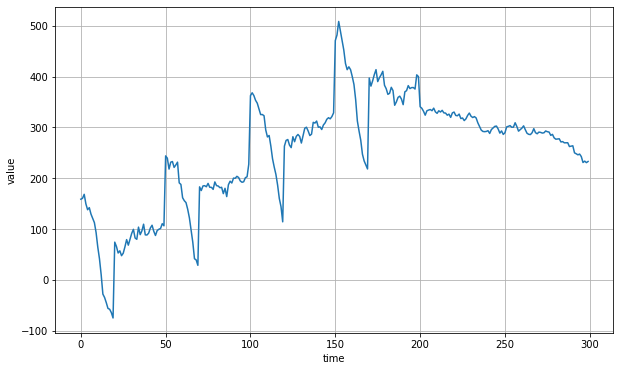

In [21]:
series = autocorrelation(time, 10) + seasonality(time, period=50, amplitude=150) + trend(time, 2)
series2 = autocorrelation(time, 5) + seasonality(time, period=50, amplitude=2) + trend(time, -1) + 550
series[200:] = series2[200:]

plot_time_series(time[:300], series[:300])

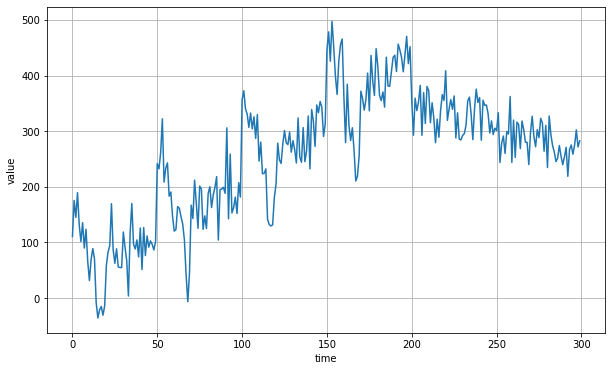

In [22]:
series = autocorrelation(time, 10) + seasonality(time, period=50, amplitude=150) + trend(time, 2)
series2 = autocorrelation(time, 5) + seasonality(time, period=50, amplitude=2) + trend(time, -1) + 550
series[200:] = series2[200:]

series += noise(time, 30)
plot_time_series(time[:300], series[:300])

# Impulse

In [23]:
def impulses(time, num_impulses, amplitude=1, seed=None):
    rnd = np.random.RandomState(seed)
    impulse_indices = rnd.randint(len(time), size=10)
    series = np.zeros(len(time))
    for index in impulse_indices:
        series[index] += rnd.rand() * amplitude
    return series

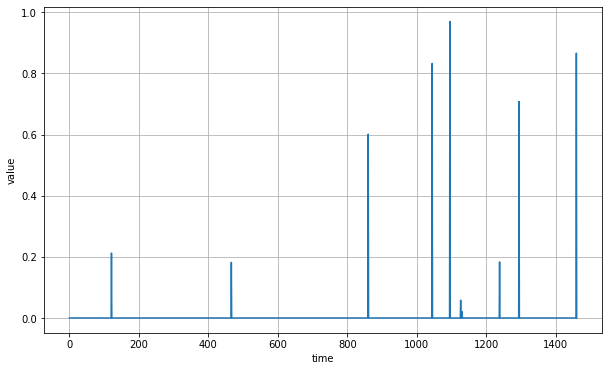

In [24]:
series = impulses(time, 10, seed=42)
plot_time_series(time, series)
plt.show()

In [25]:
def autocorrelation(source, φs):
    ar = source.copy()
    max_lag = len(φs)
    for step, value in enumerate(source):
        for lag, φ in φs.items():
            if step - lag > 0:
              ar[step] += φ * ar[step - lag]
    return ar

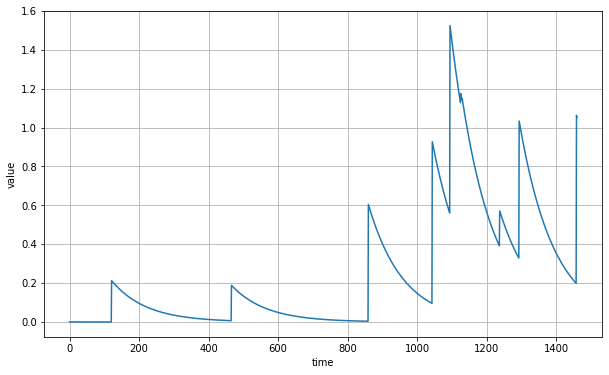

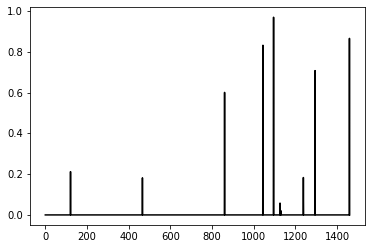

In [26]:
signal = impulses(time, 10, seed=42)
series = autocorrelation(signal, {1: 0.99})

plot_time_series(time, series)

plt.plot(time, signal, "k-")
plt.show()

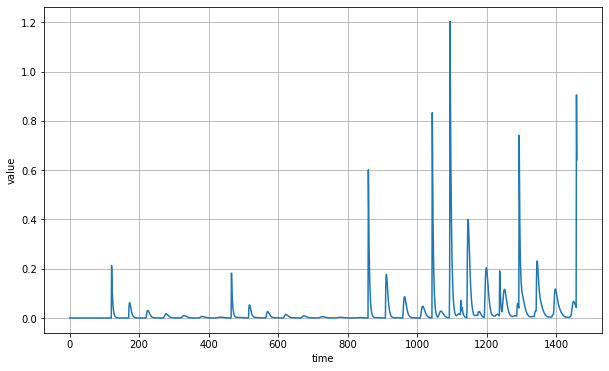

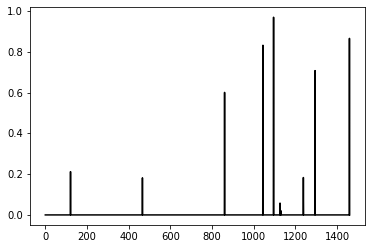

In [28]:
signal = impulses(time, 10, seed=42)
series = autocorrelation(signal, {1: 0.70, 50: 0.2})
plot_time_series(time, series)
plt.plot(time, signal, "k-")
plt.show()

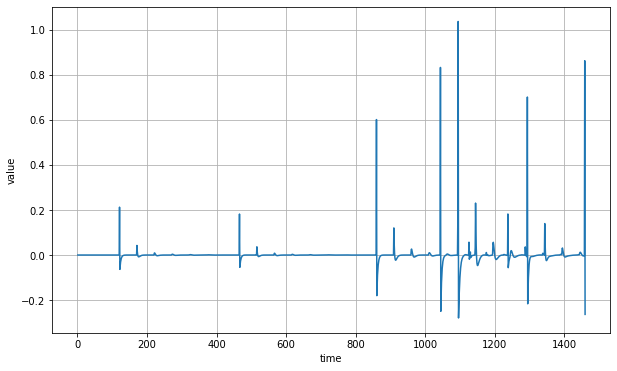

In [29]:
series_diff1 = series[1:] - series[:-1]
plot_time_series(time[1:], series_diff1)

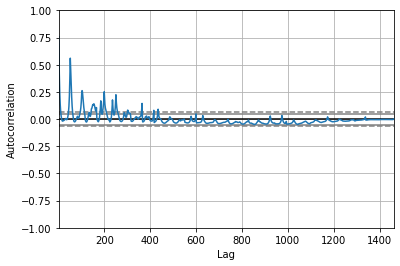

In [30]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(series)

In [35]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(series, order=(5, 1, 0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1460
Model:                 ARIMA(5, 1, 0)   Log Likelihood                2223.428
Method:                       css-mle   S.D. of innovations              0.053
Date:                Tue, 21 Sep 2021   AIC                          -4432.855
Time:                        11:54:27   BIC                          -4395.852
Sample:                             1   HQIC                         -4419.052
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.001      0.384      0.701      -0.001       0.002
ar.L1.D.y     -0.1235      0.026     -4.715      0.000      -0.175      -0.072
ar.L2.D.y     -0.1254      0.029     -4.333      0.0